# Google Play Store Apps data Analysis

Author: Prasanna Rahavendra A [Github](https://github.com/Prasanna2000), [Linkedin](https://www.linkedin.com/in/prasanna-rahavendra-33323218b/), [Kaggle](https://www.kaggle.com/apr2000).


The Google Play Store Apps dataset obtained from [this kaggle page](https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore_user_reviews.csv) is analyzed. It was exciting to deep dive into the dataset!<br> This exploratory data analysis and visualization enable us to have a lot of insights about the data. This will be an asset to app developers and companies.<br>
I have used python packages ```numpy```, ```pandas```, ```matplotlib``` and ```seaborn``` for this dataset.<br>



# Importing necessary packages

In [1]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#setting the plot style to seaborn "darkgrid" style.
sns.set_style("darkgrid")

## Data Preparation and Cleaning

In this section, we load the dataset using ```pandas``` and follow a few pre-processing steps to correct the errors and mis-matches in the dataset. This preparation will make the data suitable for analysis.

In [2]:
apps_df = apps_df = pd.read_csv("googleplaystore.csv")
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.00.00,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.00.00,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.02.04,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


we use the ```pandas``` method ```.read_csv()``` to read in the csv dataset.<br>
The ```.head()``` method helps us view the first few rows of the dataset.

In [3]:
apps_df.shape

(10841, 13)

From the ```.shape``` attribute of the DataFrame, we can see that the un-processed dataset has 10841 rows and 13 columns.

To view the all the columns' names, count of non-null values and datatype of columns, we use the ```.info()``` method on the DataFrame.

In [4]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


We can see that there are some missing values in few columns. Also, the datatype of all the columns except one, is an Object. We must replace the missing values and convert the columns to their respective datatypes.

Upon inspection of the dataset, it was found that the ```Rating``` column, of ```float``` datatype had some missing values. We fill them with zeros.<br><br>
Also, the ```Type``` column, which says if the app is free or not had one missing value. The app that had the type missing was ```Command & Conquer: Rivals```. When the details of the app was verified in Play Store, it was found to be of type ```Free```. so we set it as ```Free```.

In [5]:
apps_df[apps_df["Type"].isna()]["App"]

9148    Command & Conquer: Rivals
Name: App, dtype: object

We use the ```.isna()``` method on the column to get a boolean mask. Upon applying the boolean mask on the dataset, we retrieve the app's name stored in the ```App``` column.

In [6]:
# Filling nan values in rating column with zeros, Type column with Free and Content Rating column to Everyone
apps_df["Rating"].fillna(0,inplace=True)
apps_df["Type"].fillna("Free",inplace=True)
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


We use the ```.fillna()``` method on the column to fill the missing (NaN) values with the corresponding value. The first parameter we pass is the value that is used to fill the missing values or the "Holes" as the pandas documentation calls it.<br> The second parameter here ```inplace = True``` says that we need to alter the existing dataset. If this parameter is set to ```False```, then the ```.fillna()``` method will only alter and return a copy of the original DataFrame and the original DataFrame will be left untouched.<br><br> The other options to get rid of missing values are: <br>1. We can also replace the missing values either by the mean, median, mode or standard deviation of the column if that column is of numerical type or else we can fill it be the maximum count of the column, if it is of type string and has only a few unique values. <br>2. ```.dropna()``` method: This just drops all rows/columns that have missing values (We can specify if we need to remove the rows or the columns that have the missing value).

The ```Reviews``` column of the DataFrame is actually of type ```int``` but was wrongly read a ```string``` object. We convert the datatype of this column using the ```.astype()``` method. We pass the datatype to which the column need be converted as it's parameter.

In [7]:
apps_df["Reviews"] = apps_df["Reviews"].astype(np.int64)
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


We can see that all the columns except ```Current Ver``` and ```Android Ver``` has no missing values.<br> The ```Current Ver``` column of the DataFrame specifies the current version of the app and ```Android Ver``` specifies the lowest android level that the app can run. This is not of much use to us. So we remove those columns.

In [8]:
apps_df.drop(["Current Ver","Android Ver"],1,inplace = True)
apps_df.shape

(10841, 11)

We use the ```.drop()``` method of the DataFrame. The first parameter is the columns we need to drop. The second parameter specifies the asix we need to drop. ```0``` for dropping rows and ```1``` for dropping cloumns. Again, here we pass the argument ```inplace = True``` to tell pandas that we need to alter the original DataFrame.

There seems to be many repetitions of the same app. We need to remove them as they can totally change the results of our analysis.

We use the ```.drop_duplicates()``` method of the DataFrame to remove the duplicates. The first parameter is the key upon which the removal is done. We remove the repetitions based on the App's name. 
As we can see there were nearly 1181 repeated apps. Here, we pass the argument ```inplace = True``` to tell pandas that we need to alter the original DataFrame.

In [9]:
apps_df.drop_duplicates("App",inplace=True)
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          9660 non-null   float64
 3   Reviews         9660 non-null   int64  
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9660 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9660 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9660 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 905.6+ KB


The ```Installs``` column specifies the average number of installations of a given app. This is actually a number but since there are commas separating the digits, it is wrongly identified as a ```string```. We write a helper function of our own to convert it into integers. This function ```parse_int()``` takes a comma separated number, removes the commas, converts the number to ```int``` and returns it.<br>
Then we apply this function on the ```Installs``` column by using the ```.apply()``` method. This method takes the function that needs to be applied on the specified column.

In [10]:
def parse_int(row):
    val = ""
    row = row[:-1]
    for i in row.split(","):
        val = val+i
    try:
        return int(val)
    except:
        return 0
apps_df["Installs"] = apps_df["Installs"].apply(parse_int)
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          9660 non-null   float64
 3   Reviews         9660 non-null   int64  
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   int64  
 6   Type            9660 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9660 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9660 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 905.6+ KB


The ```Price``` column specifies the price of a given app. It is zero if the app type is free or else it has some price value in ```Dollars```. This is actually a floating point number but because there are dollar symbols at the end, they are wrongly identified as strings. We use the ```.apply()``` method and pass in a lambda function to strip off the dollar symbol and convert it into a ```float```. This function ```parse_int()``` takes one comma separated number, removes the commas, converts the number to ```int``` and returns it.<br>
Then we apply this function on the ```Installs``` column by using the ```.apply()``` method. This method takes the function that needs to be applied on the specified column.

In [11]:
apps_df["Price"] = apps_df["Price"].apply(lambda string:float(string[1:]) if string!="0" else 0.0)
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          9660 non-null   float64
 3   Reviews         9660 non-null   int64  
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   int64  
 6   Type            9660 non-null   object 
 7   Price           9660 non-null   float64
 8   Content Rating  9660 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9660 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 905.6+ KB


The ```Category``` and ```Genres``` columns have the same information. Having both these columns are a waste of memory resource, hence we remove the ```Genres``` column.<br><br>We again use the ```.drop()``` method to drop this column. We specify the column name, the axis that needs to be dropped (Row $\rightarrow$ 0/Column $\rightarrow$ 1). We also specify ```inplace = True``` to drop the column from the original DataFrame.

In [12]:
apps_df.drop("Genres",axis = 1 ,inplace=True)
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          9660 non-null   float64
 3   Reviews         9660 non-null   int64  
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   int64  
 6   Type            9660 non-null   object 
 7   Price           9660 non-null   float64
 8   Content Rating  9660 non-null   object 
 9   Last Updated    9660 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 830.2+ KB


The ```Last Updated``` column says when the app's last update was released. This is actually a date but is inferred as a string. So we convert it into a ```datetime``` object by using the ```pd.to_datetime()``` method. We use the ```.apply()``` to apply this conversion over all the values of the column.

In [13]:
apps_df["Last Updated"] = apps_df["Last Updated"].apply(pd.to_datetime)
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   object        
 1   Category        9660 non-null   object        
 2   Rating          9660 non-null   float64       
 3   Reviews         9660 non-null   int64         
 4   Size            9660 non-null   object        
 5   Installs        9660 non-null   int64         
 6   Type            9660 non-null   object        
 7   Price           9660 non-null   float64       
 8   Content Rating  9660 non-null   object        
 9   Last Updated    9660 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 830.2+ KB


Finally we have 9660 rows corresponding to 9660 different apps and 10 columns corresponding to,
<ol>
    <li>App's name.
    <li>App's Category.
    <li>App's Rating.
    <li>Number of Reviews for the app.
    <li>Overall rating for the app.
    <li>File size of the app.
    <li>Average number of installations of the app.
    <li>Type of the app (Paid/Free).
    <li>Content Rating of the app.
    <li>The date when the app's last update was released.
</ol>

We would be doing the whole data analysis over this pre-processed dataset.


## Exploratory Analysis and Visualization

Once the dataset has been cleaned and pre-processed, we can start analysing the data. We use pandas and numpy for textual analysis and Matplotlib and Seaborn for visualization.

We use the ```.describe()``` method on the DataFrame. This prints a new DataFrame containing descriptive statistics like ```count```, ```mean```, ```standard deviation```, the ```minimum``` and the ```maximum``` values and the 25$^{th}$, 50$^{th}$ and 75$^{th}$ percentiles for the numeric columns in the DataFrame.

In [14]:
apps_df.describe()

,Rating,Reviews,Installs,Price
count,9660.000000,9.660000e+03,9.660000e+03,9660.000000
mean,3.540973,2.165701e+05,7.776702e+06,1.099185
std,1.575740,1.831226e+06,5.375555e+07,16.851283
min,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,3.600000,2.500000e+01,1.000000e+03,0.000000
50%,4.200000,9.670000e+02,1.000000e+05,0.000000
75%,4.500000,2.939400e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


From the table above we can see that,
<li>Almost 75 percent of the apps in the playstore are free. i.e, The 75$^{th}$ percentile of the price is zero. <br>
<li>The maximum price of some app on playstore is $400.00 dollars.

In [15]:
apps_df[apps_df["Price"]==400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.0,Everyone,2018-05-03


Using a simple boolean masking on the DataFrame shows that the most expensive app (The one that costs $400.00) is an app called ```I'm Rich - Trump Edition```.

We now plot the distribution of the prices of paid apps.
First, we create a variable called ```paid_apps``` that has only the paid apps and it's features.

In [16]:
paid_apps = apps_df[apps_df["Type"]=="Paid"]["Price"]

To plot the distribution first we set the size of the plot to be ```10 * 5``` using the ```figsize``` parameter of the ```plt.figure()``` method.
Then we call the ```sns.distplot()``` method from Seaborn and pass ```paid_apps``` to it. We also specify a second argument, ```bins = 10```. This will tell Seaborn that the data must be equally split into 10 bins in the plot.<br>
we then set the title of the plot using ```plt.title``` method. Using the ```plt.xticks()``` method, we specify the interval for x-axis.

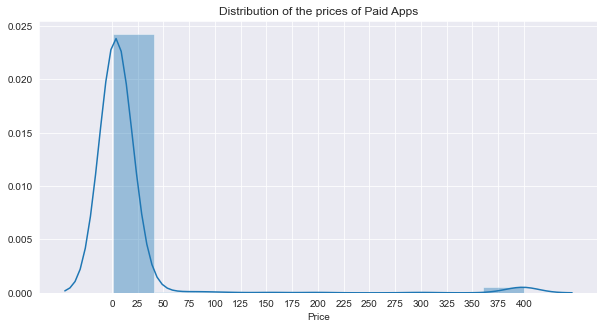

In [17]:
plt.figure(figsize=(10,5))
sns.distplot(paid_apps,bins=10)
plt.title("Distribution of the prices of Paid Apps")
plt.xticks(range(0,425,25));

<li>From the above histogram, we can see that most of the paid apps' price lies in the first part (in the range from $\$1$ to ${ \displaystyle \approx }$ $\$$40). i.e. Most paid apps are economically priced.
<li> There are also some expensive apps near the end of the plot ranging from ${ \displaystyle \approx }$ $\$$360 to $\$$400.

Next we plot the distribution of the app's user ratings. We create a variable called ``` ratings``` that holds the app ratings.

We set the size of the plot to be ```10 * 5``` using the ```figsize``` parameter of the ```plt.figure()``` method.
Again, we call the ```sns.distplot``` method of Seaborn and pass it the ```ratings``` variable. This creates a distribution plot of the ratings. We specify that ```bins = 20``` as a parameter to this method. This will tell Seaborn that the data must be equally split into 20 bins in the plot. We then specify the title for the plot using the ```plt.title``` method.

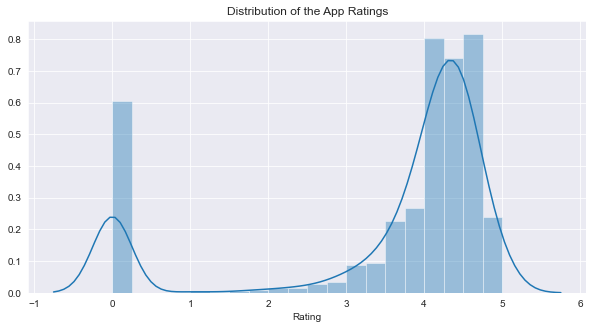

In [18]:
plt.figure(figsize=(10,5))
ratings = apps_df["Rating"]
sns.distplot(ratings,bins=20)
plt.title("Distribution of the App Ratings");

<li>It looks like most of the apps in the Play Store has a rating greater than 3.
<li>There are also many apps that have a very low rating between 0 and 1. These might be the apps that the people did not prefer.

Now we see how the number of installations of the app and the rating of the app is related. To do this, we create a bar plot where the x-axis corresponds to the number of installations and y-axis corresponds to the average rating of all apps that have a certain number of installations.

We set the size of the plot to be ```20 * 10``` using the ```figsize``` parameter of the ```plt.figure()``` method. We call the ```sns.barplot()``` method of Seaborn. The first and the second parameters of this method are the name of the columns in our DataFrame that needs to be plotted on the x and y axes correspondingly. i.e. number of installations in the x-axis and app's ratings in the y-axis. We then set the title of the plot using the ```plt.title()``` method. The label for the x-axis can be set using the ```plt.xlabel()``` method. Then we specify the number range for the y-axis.

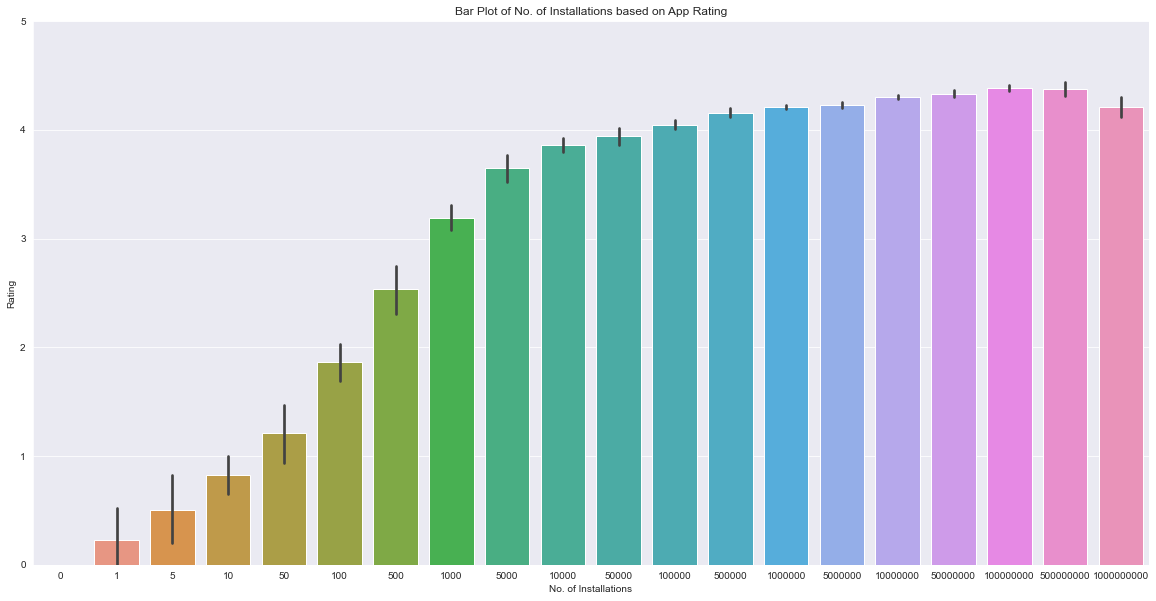

In [19]:
plt.figure(figsize=(20,10))
sns.barplot("Installs","Rating",data=apps_df)
plt.title("Bar Plot of No. of Installations based on App Rating")
plt.xlabel("No. of Installations")
plt.ylim([0,5]);

From the above bar plot, it is can be clearly seen that apps that have higher rating also has a higher number of installations.

Now we see how the number of installations of the app and the type (Pain/Free) of the app is related. To do this, we create a bar plot where the x-axis corresponds to the number of installations and y-axis corresponds to the type of apps.

We set the size of the plot to be ```10 * 3``` using the ```figsize``` parameter of the ```plt.figure()``` method. We call the ```sns.barplot()``` method of Seaborn. The first and the second parameters of this method are the name of the columns in our DataFrame that needs to be plotted on the x and y axes correspondingly. i.e. number of installations in the x-axis and type of app in the y-axis. We then set the title of the plot using the ```plt.title()``` method. The label for the x-axis can be set using the ```plt.xlabel()``` method.

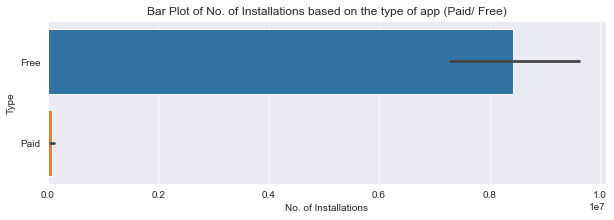

In [20]:
plt.figure(figsize=(10,3))
sns.barplot("Installs","Type",data=apps_df)
plt.title("Bar Plot of No. of Installations based on the type of app (Paid/ Free)")
plt.xlabel("No. of Installations");

It is very clear from the above bar plot that free apps are installed a lot more compared to paid apps.

In [21]:
import jovian
jovian.commit(file="googleplaystore.csv", environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "apr2000cbe/google-play-store-app-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ml/apr2000cbe/google-play-store-app-data-analysis


'https://jovian.ml/apr2000cbe/google-play-store-app-data-analysis'

## Asking and Answering Questions

In this section we will be asking some questions and answering them by manipulating the dataset.

<b>1. How many app Categories are there?</b>

In [22]:
unique_categories = apps_df["Category"].unique()
print(f"There are {unique_categories.shape[0]} different app catrgories.\n The categories are: {unique_categories}")

There are 33 different app catrgories.
 The categories are: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


To answer this question, we use the ```.unique()``` method on the ```Category``` column of the DataFrame. This method returns an array containing the unique values on that column.

<b>2. Totally how many apps were installed by people?</b>

In [23]:
total = apps_df["Installs"].sum()
print(f"At the time of compilation of this dataset, the total number of apps installed is {total}.")

At the time of compilation of this dataset, the total number of apps installed is 75122938527.


The total number of app installations can be done by using the ```.sum()``` method on the ```Installs``` column. 

<b>3. Find the number of apps with highest installations.</b>

In [24]:
high_installs = apps_df[apps_df["Installs"]==apps_df["Installs"].max()]
high_installs

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,Free,0.0,Teen,2018-08-03
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0.0,Everyone,2018-08-01
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,2018-08-03
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0.0,Everyone,2018-08-01
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000,Free,0.0,Everyone,2018-08-02
341,Hangouts,COMMUNICATION,4.0,3419249,Varies with device,1000000000,Free,0.0,Everyone,2018-07-21
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0.0,Everyone,2018-08-03
865,Google Play Games,ENTERTAINMENT,4.3,7165362,Varies with device,1000000000,Free,0.0,Teen,2018-07-16
1654,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0.0,Everyone 10+,2018-07-12
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,2018-08-03


In [25]:
print(f"There are {high_installs.shape[0]} apps which has the highest number of installations of {apps_df['Installs'].max()}.")

There are 20 apps which has the highest number of installations of 1000000000.


We create a new DataFrame called ```high_installs``` that have only the apps with the highest installations. We achieve this by boolean masking the original dataset and selecting only the apps whoes installations are equal to the maximum installations (```.max()```). using the ```.shape``` attribute on this new DataFrame, we can get the number of apps that have the highest number of installations.

<b>4. Find the number of apps with highest rating.</b>

In [26]:
high_rating = apps_df[apps_df["Rating"]==apps_df["Rating"].max()]
high_rating

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37M,1000,Free,0.0,Everyone,2018-06-26
612,American Girls Mobile Numbers,DATING,5.0,5,4.4M,1000,Free,0.0,Mature 17+,2018-07-17
615,Awake Dating,DATING,5.0,2,70M,100,Free,0.0,Mature 17+,2018-07-24
633,Spine- The dating app,DATING,5.0,5,9.3M,500,Free,0.0,Teen,2018-07-14
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0M,100,Free,0.0,Mature 17+,2018-08-01
...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14,16M,100,Free,0.0,Everyone,2017-06-19
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9M,1000,Free,0.0,Everyone,2017-12-31
10776,Monster Ride Pro,GAME,5.0,1,24M,10,Free,0.0,Everyone,2018-03-05
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6M,1000,Free,0.0,Teen,2018-06-27


In [27]:
print(f"There are {high_rating.shape[0]} apps with the highest rating of 5.")

There are 271 apps with the highest rating of 5.


Again here, we create a new DataFrame called ```high_rating``` that holds the only the apps with the highest rating (obtained using the ```.max()``` method on the ```Rating``` Column). using the ```.shape``` attribute on this new DataFrame, we can get the number of apps that have the highest rating.

<b>5. Find the top 10 app categories that have the highest installations.</b>

In [28]:
app_category_group = apps_df.groupby("Category")
total_installs = app_category_group[["Installs"]].sum()
total_installs.sort_values("Installs",ascending=False).head(10)

,Installs
Category,
GAME,13878924415
COMMUNICATION,11038276251
TOOLS,8001771915
PRODUCTIVITY,5793091369
SOCIAL,5487867902
PHOTOGRAPHY,4649147655
FAMILY,4427941505
VIDEO_PLAYERS,3926902720
TRAVEL_AND_LOCAL,2894887146


First we group the DataFrame by the ```Category``` column using the ```.groupby()``` method on the DataFrame. Then we can call ```.sum()``` method on the ```Installs``` column of this groupby object. This returns us a new DataFrame that has the app category as the index and the sum of installations of all the apps in that category.<br> We then call the ```.sort_values()``` method on this DataFrame as specify that the sorting must be done based on the ```Installs``` column as the first parameter and then we set ```ascending = False``` to tell that we need to sort the values in descending order. Calling the ```.head(10)``` on this DataFrame gives us the top 10 categories having the most number of installations.

From the above DataFrame, it looks like ```GAME``` category had the most number of installations followed by ```COMMUNICATION```, ```TOOLS``` and ```PRODUCTIVITY```.

<b>6. Find the top 10 app categories that have the lowest installations.</b>

In [29]:
total_installs.sort_values("Installs",ascending=True).head(10)

,Installs
Category,
EVENTS,15973161
BEAUTY,27197050
PARENTING,31521110
MEDICAL,38193177
COMICS,44981150
LIBRARIES_AND_DEMO,52995910
AUTO_AND_VEHICLES,53130211
HOUSE_AND_HOME,97212461
ART_AND_DESIGN,114338100


We use the same DataFram from the previous question. We sort values again on the number of installations but we set ```ascending = True```. This will sort the values in ascending order. Calling the ```.head(10)``` method on this gives us the categories that have the lowest installations.

From the above DataFrame, it looks like ```EVENTS``` category had the least number of installations followed by ```BEAUTY```, ```PARENTING``` and ```MEDICAL```.

The above 2 questions can also be answered using a bar plot of the number of installations based on the app category.

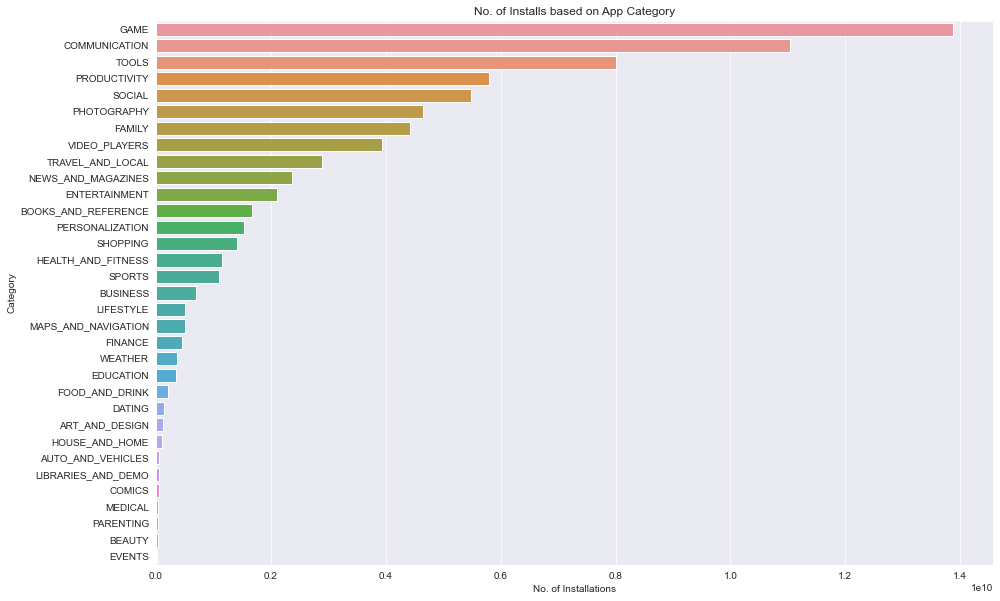

In [30]:
sorted_total_installs = total_installs.sort_values("Installs",ascending=False)
plt.figure(figsize=(15,10))
x = sorted_total_installs["Installs"]
y = sorted_total_installs.index.tolist()
plt.title("No. of Installs based on App Category")
sns.barplot(x,y)
plt.xlabel("No. of Installations")
plt.ylabel("Category");

To obtain the bar plot number of installations based on the category of the app, we first sort the same DataFrame used in the above 2 question in descending order (using ```.sort_values()``` method). Then we call the ```sns.barplot()``` method of Seaborn. The first 2 parameters specifies values for the x and y axes. and we give the sorted DataFrame as the data to be plotted.

<b>7. Which app category has the highest number of paid apps?</b>

In [31]:
app_category_group = apps_df.groupby("Category")
app_type = pd.DataFrame(app_category_group["Type"].apply(lambda x:x.value_counts()))
app_type

Type
Category                    
ART_AND_DESIGN    Free    61
                  Paid     3
AUTO_AND_VEHICLES Free    82
                  Paid     3
BEAUTY            Free    53
...                      ...
TRAVEL_AND_LOCAL  Paid    12
VIDEO_PLAYERS     Free   159
                  Paid     4
WEATHER           Free    71
                  Paid     8

[63 rows x 1 columns]

First we group the apps based on the Category. This is achieved using ```.groupby()``` method. Then we create a new DataFrame by applying a lambda function on the ```Type``` column of the DataFrame. This lambda function takes in pandas Series corresponding to a category. It returns the count of the unique values in that series using the ```.value_counts()``` method.

In [32]:
app_type.reset_index(inplace = True)
app_type.rename(columns={"Type":"Count","level_1":"Type"},inplace = True)
app_type

,Category,Type,Count
0,ART_AND_DESIGN,Free,61
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,82
3,AUTO_AND_VEHICLES,Paid,3
4,BEAUTY,Free,53
...,...,...,...
58,TRAVEL_AND_LOCAL,Paid,12
59,VIDEO_PLAYERS,Free,159
60,VIDEO_PLAYERS,Paid,4
61,WEATHER,Free,71


Once that is done, we have a DataFrame that is multi-indexed (both Category and type are indexes here). We use the ```.reset_index()``` This will move the two columns into the DataFrame and create a numbered index. We also rename the DataFrame's columns using the ```.rename()``` method on this new DataFrame. We pass a dictionary where it's keys are the old names of the columns and it's values are the name we need to set to those columns. we use ```inplace = True``` to alter the original DataFrame.

In [33]:
paid_apps = app_type[app_type["Type"]=="Paid"]
free_apps = app_type[app_type["Type"]=="Free"]
sorted_values = paid_apps.sort_values("Count",ascending=False)
sorted_values.head()

,Category,Type,Count
21,FAMILY,Paid,183
38,MEDICAL,Paid,83
27,GAME,Paid,82
44,PERSONALIZATION,Paid,81
56,TOOLS,Paid,78


Now we create 2 different DataFrames. The first one contains only the paid apps while the second one has the free apps. We then sort the ```paid_apps``` DataFrame in the descending order.

It can be seen that the category called the ```FAMILY``` has the most number of paid apps.

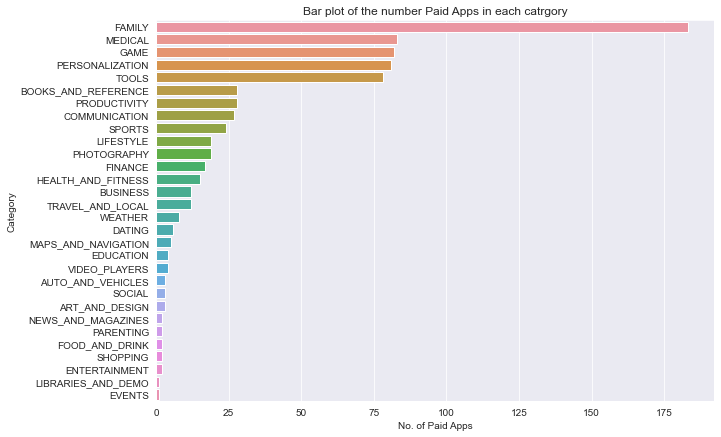

In [34]:
plt.figure(figsize=(10,7))
sns.barplot("Count","Category",data=sorted_values)
plt.title("Bar plot of the number Paid Apps in each catrgory")
plt.xlabel("No. of Paid Apps");

This can also be verified visually using a bar plot of the number of paid apps in each category. First we set the size of the plot to be ```10*7```. Then we call ```sns.barplot()```. We specify the x and y-axis columns and pass the DataFrame to be plotted. We also specify the title for the plot using the ```plt.title()``` method and x and y axes labels using the ```plt.xlabel()``` and ```plt.ylabel()``` methods.

<b>8. Which app category has the highest number of free apps?</b>

In [35]:
sorted_free = free_apps.sort_values("Count",ascending=False)
sorted_free.head()

,Category,Type,Count
20,FAMILY,Free,1649
26,GAME,Free,877
55,TOOLS,Free,749
7,BUSINESS,Free,408
33,LIFESTYLE,Free,351


We use the ```free_apps``` DataFrame obtained in the previous question. We sort the data based on the number of apps. Here we specify ```ascending = False``` because we need to sort the values in descending order.

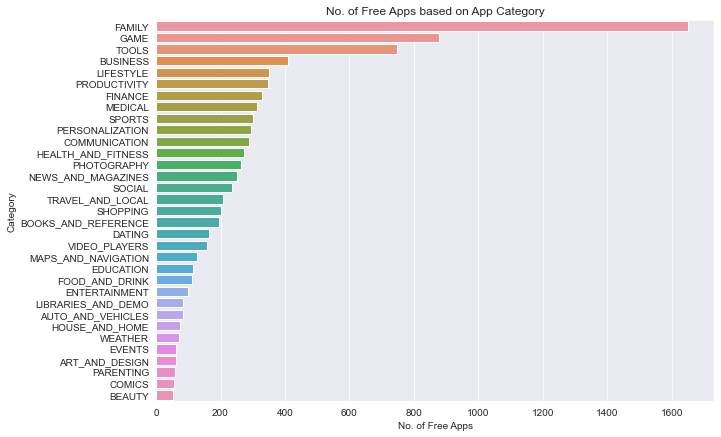

In [36]:
plt.figure(figsize=(10,7))
sns.barplot("Count","Category",data=sorted_free)
plt.title("No. of Free Apps based on App Category")
plt.xlabel("No. of Free Apps");

We also use ```sns.barplot()``` to visualize the results as bar plots. We specify the x and y-axis columns and pass the DataFrame to be plotted. We also specify the title for the plot using the ```plt.title()``` method and x and y axes labels using the ```plt.xlabel()``` and ```plt.ylabel()``` methods.

It looks like again, the ```FAMILY``` category has the most number of free apps followed ```GAME``` category.

<b>9. Which app Content Rating has the most number of installations?</b>

In [37]:
content_rating_df = apps_df.groupby("Content Rating")

First we group the DataFrame by the Content Rating column using the ```.groupby()``` method. 

In [38]:
content_rating_installs = content_rating_df[["Installs"]].sum()
sorted_content = content_rating_installs.sort_values("Installs",ascending=False)
sorted_content

,Installs
Content Rating,
Everyone,52179353961
Teen,16487275393
Everyone 10+,4016271795
Mature 17+,2437986878
Adults only 18+,2000000
Unrated,50500


Now we sum all the installations of each of all the apps in each content rating and sort them in descending order. To visualize the results using a bar plot, we use the ```sns.barplot()``` method, specify the x and y axes column names for the plot and give the DataFrame to be plotted. We also specify the title for the plot using the ```plt.title()``` method and x and y axes labels using the ```plt.xlabel()``` and ```plt.ylabel()``` methods.

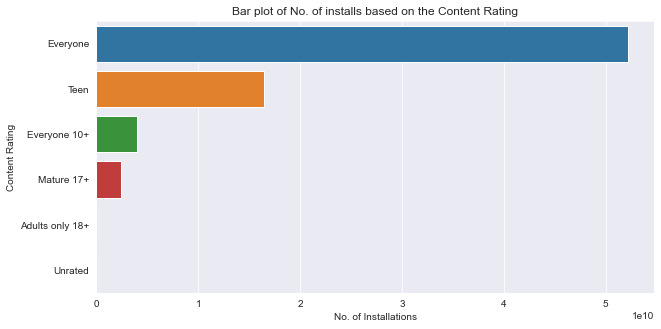

In [39]:
plt.figure(figsize=(10,5))
sns.barplot("Installs",sorted_content.index,data=sorted_content)
plt.title("Bar plot of No. of installs based on the Content Rating")
plt.xlabel("No. of Installations")
plt.ylabel("Content Rating");

The apps that are meant for ```Everyone``` has the most number of installs comapred to the others. This can be verified using both the dataframe printed above as well as from the bar plot.<br><br>
The bars for ```Adults only 18+``` and ```Unrated``` are not visible because the number of installations for these Content Ratings are ver low compared to other Content Ratings. This can be confirmed using the table above.

<b>10. Which app category has the maximum number of apps?</b>

In [40]:
app_category_group = apps_df.groupby("Category")

We again group the DataFrame by the Category column.

In [41]:
app_count = app_category_group[["App"]].count()
sorted_app_count = app_count.sort_values("App",ascending=False)
sorted_app_count.head(10)

,App
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,370
FINANCE,345


Here, we apply the ```.count()``` method on the ```App``` column to get the total count of apps present in a given Category and sort the values in descending order.

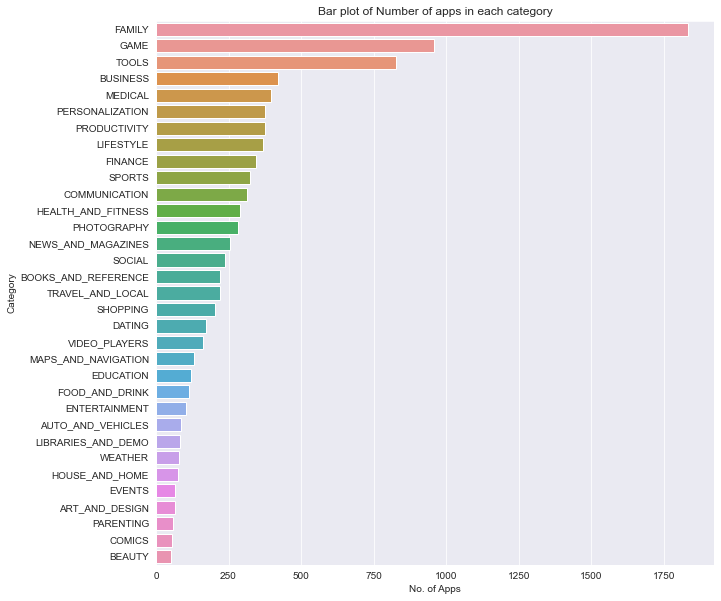

In [42]:
plt.figure(figsize=(10,10))
sns.barplot("App",sorted_app_count.index,data=sorted_app_count)
plt.title("Bar plot of Number of apps in each category")
plt.xlabel("No. of Apps")
plt.ylabel("Category");

We also visualize the results using a bar plot using the ```sns.barplot()``` method and pass the x and y axes columns. We then pass the DataFrame to be plotted. title for the plot is specified using the ```plt.title()``` method and x and y axes labels are specified using the ```plt.xlabel()``` and ```plt.ylabel()``` methods.

From the above table and bar plot We can see that the ```FAMILY``` category has the most number of apps followed be ```GAME``` and ```TOOLS```.

<b>11. Which Content Rating has the maximum number of apps?</b>

In [43]:
app_contentr_group = apps_df.groupby("Content Rating")

First we group the DataFrame by the Content Rating column.

In [44]:
contentr_app_count = app_contentr_group[["App"]].count()
sorted_contentr_count = contentr_app_count.sort_values("App",ascending=False)
sorted_contentr_count.head(10)

,App
Content Rating,
Everyone,7904
Teen,1036
Mature 17+,393
Everyone 10+,322
Adults only 18+,3
Unrated,2


Here, we apply the ```.count()``` method on the ```App``` column to get the total count of apps present in each Content Rating and then sort the values in descending order.

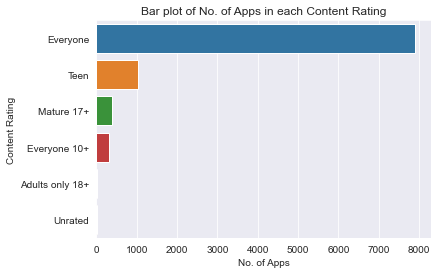

In [45]:
sns.barplot("App",sorted_contentr_count.index,data=sorted_contentr_count)
plt.title("Bar plot of No. of Apps in each Content Rating")
plt.xlabel("No. of Apps")
plt.ylabel("Content Rating");

We now use bar plots to visualize the results. We use the ```sns.barplot()``` method and pass the x and y axes columns. We then pass the DataFrame to be plotted. Title for the plot is specified using the ```plt.title()``` method and x and y axes labels are specified using the ```plt.xlabel()``` and ```plt.ylabel()``` methods.

From the above table and plot, we can see that the ```Everyone``` content rating has the maximum number of apps.

<b>12. How many apps were updated after August 2018?</b>

In [46]:
deadline = pd.to_datetime("Aug 2018")
apps_updated = apps_df[apps_df["Last Updated"]>deadline]
apps_updated

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
14,3D Color Pixel by Number - Sandbox Art Coloring,ART_AND_DESIGN,4.4,1518,37M,100000,Free,0.00,Everyone,2018-08-03
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,5000000,Free,0.00,Everyone,2018-08-03
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24M,500000,Free,0.00,Everyone,2018-08-02
70,Fines of the State Traffic Safety Inspectorate...,AUTO_AND_VEHICLES,4.8,116986,35M,5000000,Free,0.00,Everyone,2018-08-02
71,SK Enca Direct Malls - Used Cars Search,AUTO_AND_VEHICLES,3.6,1379,16M,500000,Free,0.00,Everyone,2018-08-02
...,...,...,...,...,...,...,...,...,...,...
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,1000,Paid,7.99,Everyone,2018-08-08
10790,HipChat - beta version,COMMUNICATION,4.1,1035,20M,50000,Free,0.00,Everyone,2018-08-07
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496,81M,1000000,Free,0.00,Teen,2018-08-07
10805,Scoreboard FR,LIFESTYLE,4.3,3,15M,100,Free,0.00,Everyone,2018-08-07


First we create a variable called ```deadline```. This variable is the is a pandas datetime object. We use this object to create a boolean masking on our dataset to get the apps that were updated after August 2018.

Using the ```.shape``` attribute, we can see that there are 768 apps that were updated to a newer version after August 2018.

In [47]:
print(f"There are {apps_updated.shape[0]} apps that were updated after August 2018.")

There are 768 apps that were updated after August 2018.


<b>13. Which app category has the highest user Rating?</b>

In [48]:
category_group = apps_df.groupby("Category")

We first group the DataFrame by the Category using the ```.groupby()``` method.

In [49]:
mean_ratings = category_group[["Rating"]].mean()

We then calculate the mean ratings for each Category. using the ```.mean()``` method. 

In [50]:
sorted_mean_ratings = mean_ratings.sort_values("Rating",ascending=False)
sorted_mean_ratings.head()

,Rating
Category,
EDUCATION,4.327731
ART_AND_DESIGN,4.153125
ENTERTAINMENT,4.135294
GAME,4.039208
COMICS,4.032143


We sort the values in descending order based on the app's rating.

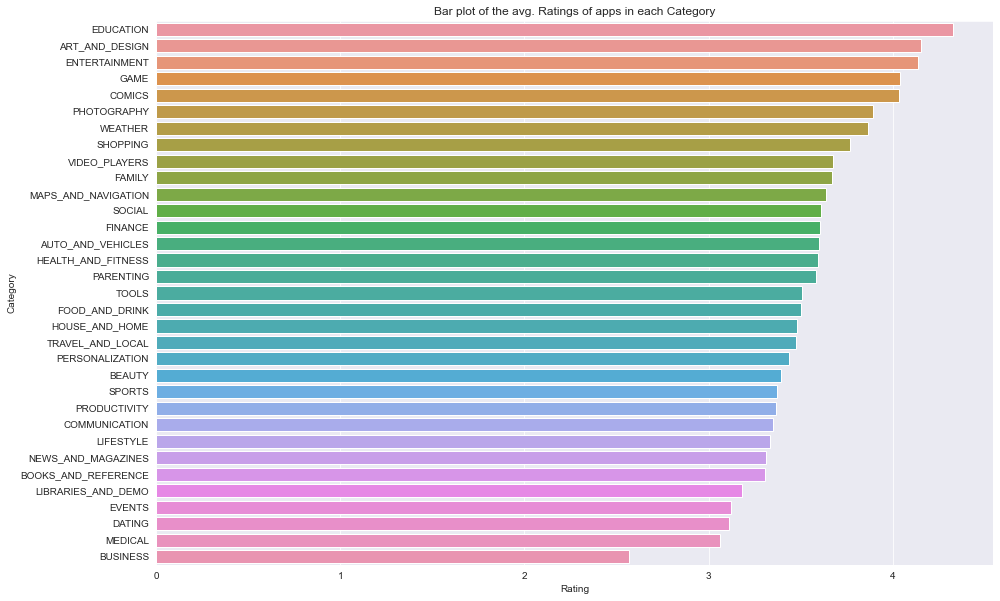

In [51]:
plt.figure(figsize=(15,10))
sns.barplot("Rating",sorted_mean_ratings.index,data=sorted_mean_ratings);
plt.title("Bar plot of the avg. Ratings of apps in each Category");

We can also visualize this result using the a bar plot. We use the ```sns.barplot()``` method and pass in the x and y columns for the plot and specify the DataFrame that needs to be plotted. We also set the title for the plot using ```plt.title()``` method.

It is clear from the DataFrame and the bar chart above that the app category called ```Education``` has the highest average ratings.

<b>14. On what day of the week were most of the apps updated?</b>

In [52]:
apps_df["Update day"] = apps_df["Last Updated"].dt.day_name()
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Update day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,2018-01-07,Sunday
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,2018-01-15,Monday
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,2018-08-01,Wednesday
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,2018-06-08,Friday
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,2018-06-20,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,2017-07-25,Tuesday
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,2018-07-06,Friday
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5M,1000,Free,0.0,Everyone,2017-01-20,Friday
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,2015-01-19,Monday


First we create a new column in the DataFrame called ```Update day```. This will hold the name of the week day when the app was updated. This is done using the ```.dt.day_name()``` method.

In [53]:
apps_day_group = apps_df.groupby("Update day")

We now group the DataFrame by the ```Update day``` column that we created above.

In [54]:
apps_day_count = apps_day_group[["App"]].count()
sorted_apps_day_count = apps_day_count.sort_values("App", ascending = False)
sorted_apps_day_count

,App
Update day,
Thursday,1754
Wednesday,1707
Tuesday,1696
Friday,1614
Monday,1568
Saturday,710
Sunday,611


Here, we first count the number of apps updated on each day using the ```.count()``` method on the Apps column of the groupby object. We then sort the app count in descending order.

We can also visualize the results using a pie chart. We use the ```plt.pie()``` method to create a pie chart of the count of apps updated on each day. we specify the data to be plotted and the labels to be displayed as the first two parameters of this method. The third parameter is used to display the percentage of that value.
Title for the plot is specified using the ```plt.title()``` method.

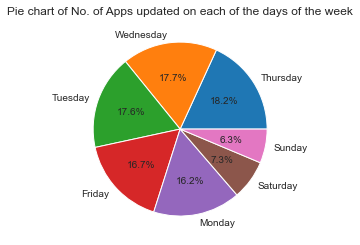

In [55]:
plt.pie(sorted_apps_day_count["App"],labels = sorted_apps_day_count.index, autopct='%1.1f%%')
plt.title("Pie chart of No. of Apps updated on each of the days of the week");

From the DataFrame and the pie chart above, we can see that most of the apps were updated on ```Thursday```.

<b>15. How many apps were last updated in the year 2017?</b>

In [56]:
year_count = apps_df["Last Updated"].dt.year.value_counts()
year_count

2018    6285
2017    1794
2016     779
2015     449
2014     203
2013     108
2012      26
2011      15
2010       1
Name: Last Updated, dtype: int64

For answering this question, we use the ```.dt.year``` method. This will return the year for a given date. Using the ```.value_counts()``` will give us the count of apps that were last updated in each year.

In [57]:
print(f"There are {year_count.loc[2017]} apps that were last updated in the year 2017.")

There are 1794 apps that were last updated in the year 2017.


## Inferences and Conclusion

A lot of analysis and visualization were done and a lot of insights were obtained from the data. Also, questions related to the data were asked and answered by doing appropriate manipulations to the dataset.

<b>Insights from the data: </b>
    <ol>
        <li>Almost 75 percent of the apps in the playstore are free.<br><br>
        <li>The maximum price of some app on playstore is $\$$400.00, corresponding to an app called ```I'm Rich - Trump Edition```.<br><br>
        <li>Most paid apps are economically priced and only a few apps are expensive.<br><br>
        <li>Most of the apps in the Play Store has a rating greater than 3. There are also many apps that have a very low rating between 0 and 1 which may correspond to apps that the people did not prefer.<br><br>
        <li>Apps that have higher installations also has a higher rating.
    </ol>

<b>Answers for the Questions asked: </b><br>
<ol>
<li> How many app Categories are there?<br>
ANS: There are 33 different app catrgories.<br><br>
    
<li> Totally how many apps were installed by people?<br>
ANS: At the time of compilation of this dataset, the total number of apps installed by people is 75121360417.<br><br>
    
<li> Find the number of apps with highest installations.<br>
ANS: There are 20 apps which has the highest number of installations of 1000000000.<br><br>

<li> Find the number of apps with highest rating.<br>
ANS: There are 271 apps with the highest rating of 5.<br><br>

<li>  Find the top 10 app categories that have the highest installations.<br>
ANS: GAME category had the most number of installations followed by COMMUNICATION, TOOLS, PRODUCTIVITY, SOCIAL, PHOTOGRAPHY, FAMILY, VIDEO_PLAYERS, TRAVEL_AND_LOCAL and NEWS_AND_MAGAZINES.<br><br>

<li> Find the top 10 app categories that have the lowest installations.<br>
ANS: EVENTS category had the most number of installations followed by BEAUTY, PARENTING, MEDICAL, COMICS, LIBRARIES_AND_DEMO, AUTO_AND_VEHICLES, HOUSE_AND_HOME, ART_AND_DESIGN and DATING.<br><br>

<li>  Which app category has the highest number of paid apps?<br>
ANS: The category called the FAMILY has the most number of paid apps.<br><br>

<li> Which app category has the highest number of free apps?<br>
ANS: Again, the FAMILY category has the most number of free apps followed GAME category.<br><br>

<li> Which app Content Rating has the most number of installations?<br>
ANS: The apps that are meant for Everyone has the most number of installs comapred to the others.<br><br>

<li>  Which app category has the maximum number of apps?<br>
ANS:  The FAMILY category has the most number of apps followed be GAME and TOOLS.<br><br>

<li> Which Content Rating has the maximum number of apps?<br>
ANS:  The Everyone content rating has the maximum number of apps.<br><br>

<li> How many apps were updated after August 2018?<br>
ANS: 768 apps were updated to an newer version after August 2018.<br><br>

<li> Which app category has the highest user Rating?<br>
ANS: The Education category has the highest average ratings.<br><br>

<li> On what day of the week were most of the apps updated?<br>
ANS: Most of the apps were updated on Thursday.<br><br>

<li> How many apps were last updated in the year 2017?<br>
ANS: 1791 apps were last updated in the year 2017.<br><br>

## References and Future Work

A lot of different questions can also be answered by combining this dataset with the app reviews dataset. This dataset has many individual user reviews for all the apps that are available in this dataset. This dataset can also be found in the same [Kaggle page](https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore_user_reviews.csv). Further, many tasks can be framed from this data and simple machine learning and deep learning algorithms can be trained to perform that task. For example, given an app's ratings and the user reviews, we can train a machine learning system that says if the app can be installed or not. 

Documentation and tutorials for the modules:
1. [NumPy Tutorials](http://scipy-lectures.org/intro/numpy/index.html)
2. [Pandas Tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)
3. [Matplotlib Tutorials](https://matplotlib.org/tutorials/index.html)
4. [Seaborn Tutorials](https://seaborn.pydata.org/tutorial.html)